In [111]:
import pandas as pd
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

print ("Pandas", pd.__version__)
print ("Numpy", np.__version__)
print ("Python", sys.version[:6])

Pandas 1.3.4
Numpy 1.20.3
Python 3.9.7 


In [87]:
df=pd.read_csv("C:/Users/Cristofer/Downloads/housing.csv")
print("El archivo tiene", df.shape[0],"Filas y ",df.shape[1],"columnas")
df

El archivo tiene 545 Filas y  13 columnas


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [89]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [90]:
df.describe(include=object)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [91]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [92]:
print ("Cantidad de duplicados eliminados:" ,df.shape[0]-df.drop_duplicates().shape[0])

Cantidad de duplicados eliminados: 0


In [93]:
df[["price"]]

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [94]:
scaler = StandardScaler()
scaler.fit(df[["price"]])
df["price_scala"]=scaler.transform(df[["price"]])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_scala
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,4.566365
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,4.004484
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,4.004484
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,3.985755
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,3.554979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,-1.576868
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,-1.605149
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,-1.614327
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,-1.614327


In [97]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_scala
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,4.566365
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,4.004484
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,4.004484
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,3.985755
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,3.554979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,-1.576868
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,-1.605149
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,-1.614327
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,-1.614327


In [99]:
split=np.random.rand(df["area"].shape[0])<0.7
x_training=df["area"][split]
y_training=df["price_scala"][split]
x_test=df["area"][~split]
y_test=df["price_scala"][~split]
x_training

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
538    3649
539    2990
540    3000
541    2400
542    3620
Name: area, Length: 383, dtype: int64

In [102]:
lig_reg=LinearRegression()
x=np.array(x_training).reshape(-1,1)
#X = x.reshape(-1,1) # Generación de vector columna
lig_reg.fit(x,y_training)

LinearRegression()

In [114]:
lig_reg.intercept_
lig_reg.coef_

array([0.00026448])

In [116]:
x_test=np.array(x_test).reshape(-1,1)
y_predict=lig_reg.predict(x_test)

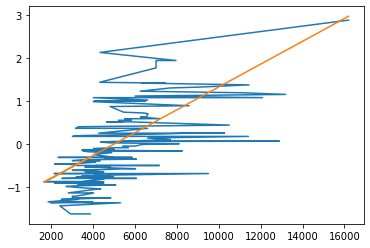

In [108]:
plt.plot(x_test,y_test)
plt.plot(x_test,y_predict,"-")

In [112]:
r2_score(y_test, y_predict)

0.29999005838486925

### Regresión en examen


In [134]:
df=pd.read_csv("C:/Users/Cristofer/Bootcamp_python/employee_attrition.csv")
print("El archivo tiene", df.shape[0],"Filas y ",df.shape[1],"columnas")
df.head(3)

El archivo tiene 1470 Filas y  35 columnas


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [135]:
df["YearsAtCompany"]=df["YearsAtCompany"].apply(lambda x: int(x.replace("!","")))
df["Attrition2"]=0
df["Attrition2"][df["Attrition"]=="Yes"]=1
df.drop(["EmployeeCount","StandardHours"],axis=1, inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_13960/94804077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Attrition2"][df["Attrition"]=="Yes"]=1


In [161]:
correlacion=df.corr()
correlacion[correlacion!=1].max()

Age                         0.680381
DailyRate                   0.046135
DistanceFromHome            0.077924
Education                   0.208034
EmployeeNumber              0.062227
EnvironmentSatisfaction     0.037600
HourlyRate                  0.050263
JobInvolvement              0.046135
JobLevel                    0.950300
JobSatisfaction             0.030571
MonthlyIncome               0.950300
MonthlyRate                 0.039563
NumCompaniesWorked          0.299635
PercentSalaryHike           0.773550
PerformanceRating           0.773550
RelationshipSatisfaction    0.053535
StockOptionLevel            0.062227
TotalWorkingYears           0.782208
TrainingTimesLastYear       0.028072
WorkLifeBalance             0.049856
YearsAtCompany              0.769212
YearsInCurrentRole          0.758754
YearsSinceLastPromotion     0.618409
YearsWithCurrManager        0.769212
Attrition2                  0.077924
dtype: float64

In [166]:
df.corr()["MonthlyIncome"]

Age                         0.497855
DailyRate                   0.007707
DistanceFromHome           -0.017014
Education                   0.094961
EmployeeNumber             -0.014829
EnvironmentSatisfaction    -0.006259
HourlyRate                 -0.015794
JobInvolvement             -0.015271
JobLevel                    0.950300
JobSatisfaction            -0.007157
MonthlyIncome               1.000000
MonthlyRate                 0.034814
NumCompaniesWorked          0.149515
PercentSalaryHike          -0.027269
PerformanceRating          -0.017120
RelationshipSatisfaction    0.025873
StockOptionLevel            0.005408
TotalWorkingYears           0.772893
TrainingTimesLastYear      -0.021736
WorkLifeBalance             0.030683
YearsAtCompany              0.514285
YearsInCurrentRole          0.363818
YearsSinceLastPromotion     0.344978
YearsWithCurrManager        0.344079
Attrition2                 -0.159840
Name: MonthlyIncome, dtype: float64

In [237]:
split=np.random.rand(df["JobLevel"].shape[0])<0.7
x_train=df["JobLevel"][split]
y_train=df["MonthlyIncome"][split]

x_test=df["JobLevel"][~split]
y_test=df["MonthlyIncome"][~split]

In [238]:
lig_reg=LinearRegression()
x=np.array(x_train).reshape(-1,1)
#X = x.reshape(-1,1) # Generación de vector columna
lig_reg.fit(x,y_train)

LinearRegression()

In [239]:
print (lig_reg.intercept_,lig_reg.coef_)

-1876.7911316857026 [4063.95859413]


In [240]:
x_test=np.array(x_test).reshape(-1,1)
y_predict=lig_reg.predict(x_test)

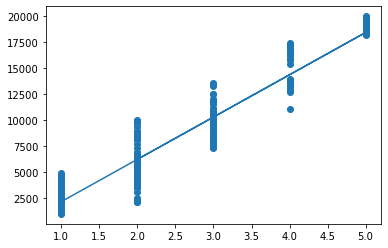

In [241]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict,"-");

In [242]:
r2_score(y_test, y_predict)

0.8987482102336114

In [246]:
coef=[]
intercepcion=[]
for i in range(1000):
    split=np.random.rand(df["JobLevel"].shape[0])<0.7
    x_train=df["JobLevel"][split]
    y_train=df["MonthlyIncome"][split]

    x_test=df["JobLevel"][~split]
    y_test=df["MonthlyIncome"][~split]
    
    lig_reg=LinearRegression()
    x=np.array(x_train).reshape(-1,1)
#X = x.reshape(-1,1) # Generación de vector columna
    lig_reg.fit(x,y_train)
    coef.append(lig_reg.intercept_)
    intercepcion.append(lig_reg.coef_)
coef=(sum(coef)/len(coef))
intercepcion=(sum(intercepcion)/len(intercepcion))

y_predict=x_test*lig_reg.coef_+lig_reg.intercept_

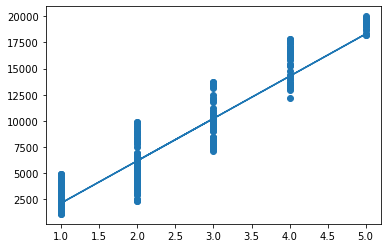

In [247]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict,"-");

In [248]:
r2_score(y_test, y_predict)

0.9069179631250875

In [194]:
##2

In [210]:
correlacion=pd.DataFrame(df.corr()["MonthlyIncome"])
columna=correlacion[(correlacion["MonthlyIncome"]>0.4) &(correlacion["MonthlyIncome"]!=1)|(correlacion["MonthlyIncome"]<-0.4)&(correlacion["MonthlyIncome"]!=1)].index
columna=list(columna)

In [211]:
df[columna]

,Age,JobLevel,TotalWorkingYears,YearsAtCompany
0,41,2,8,6
1,49,2,10,10
2,37,1,7,0
3,33,1,8,8
4,27,1,6,2
...,...,...,...,...
1465,36,2,17,5
1466,39,3,9,7
1467,27,2,6,6
1468,49,2,17,9


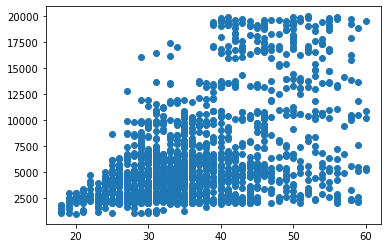

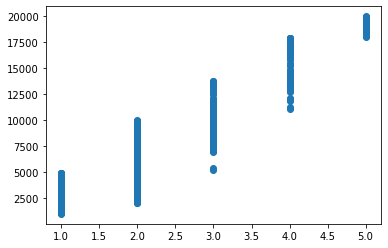

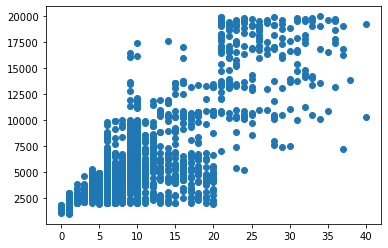

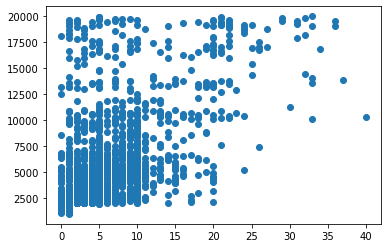

In [229]:
for i in range(len(columna)):
    plt.scatter(df[columna[i]], df["MonthlyIncome"]);
    plt.show()

In [233]:
from sklearn.preprocessing import PolynomialFeatures
split=np.random.rand(df[columna].shape[0])<0.7
x_train=df[columna][split]
y_train=df["MonthlyIncome"][split]
pf = PolynomialFeatures(degree = 3)
X = pf.fit_transform(x_train.reshape(-1,1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y_train) 

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [212]:
coef=[]
intercepcion=[]
for i in range(100):
    split=np.random.rand(df[columna].shape[0])<0.7
    x_train=df[columna][split]
    y_train=df["MonthlyIncome"][split]

    x_test=df[columna][~split]
    y_test=df["MonthlyIncome"][~split]
    
    lig_reg=LinearRegression()
    x=np.array(x_train).reshape(-1,1)
#X = x.reshape(-1,1) # Generación de vector columna
    lig_reg.fit(x,y_train)
    coef.append(lig_reg.intercept_)
    intercepcion.append(lig_reg.coef_)
coef=(sum(coef)/len(coef))
intercepcion=(sum(intercepcion)/len(intercepcion))

ValueError: Found input variables with inconsistent numbers of samples: [4180, 1045]

In [217]:
y_train

0       5993
2       2090
3       2909
4       3468
6       2670
        ... 
1463    9936
1464    2966
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1045, dtype: int64